## Advanced Lane Finding + Vehicle Detection Project

This project is a combination of Advanced Lane Finding and Vehicle Detection.



* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

In [1]:
import importlib
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roadlanes import draw_lane
import roadlanes
import adv_lane_lines
import searchlines
import perspectivetransform
import correctcamera
import object_detection_findmatches
from glob import glob
import object_detection_utils
import object_detection_colorspaces
import object_detection_fecvector
import object_detection_car_notcar

In [2]:
importlib.reload(adv_lane_lines)
importlib.reload(roadlanes)
importlib.reload(searchlines)
importlib.reload(perspectivetransform)
importlib.reload(correctcamera)

<module 'correctcamera' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Vehicle-Detection-master\\correctcamera.py'>

# Object Finding - using various methods
## Using historgrams

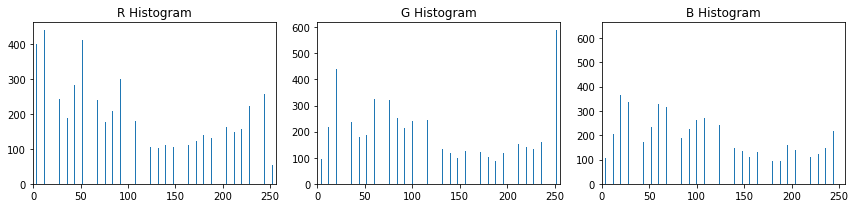

In [3]:
importlib.reload(object_detection_utils)
object_detection_utils.main_histogram()

## Using color spaces and clustering to discover objects

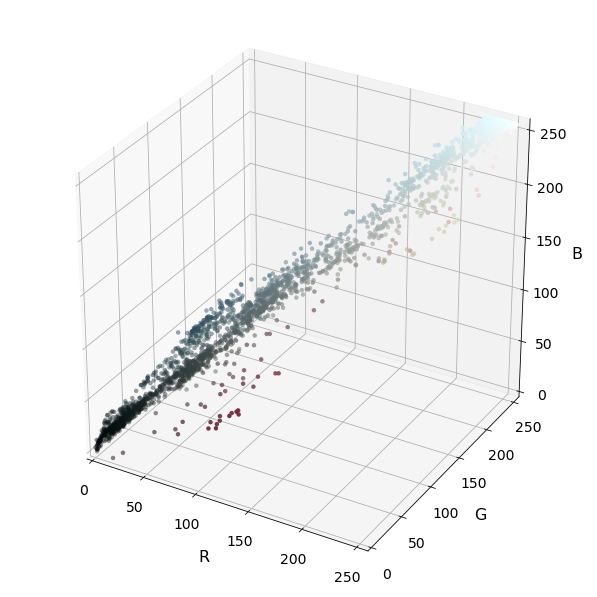

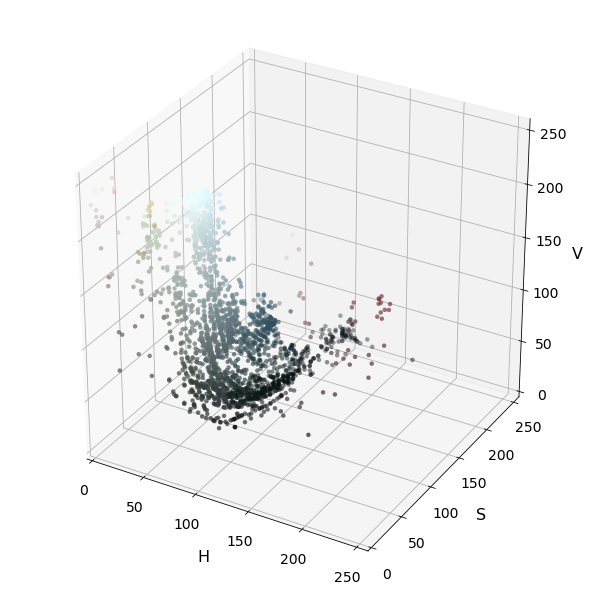

In [4]:
importlib.reload(object_detection_colorspaces)
object_detection_colorspaces.main_color_spaces()

## Object detection using template matching

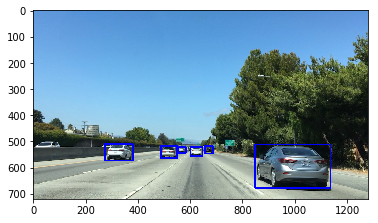

In [5]:
importlib.reload(object_detection_findmatches)
object_detection_findmatches.main_drawboxes()

In [6]:
## using feature vector approach for pictures of lower resolution

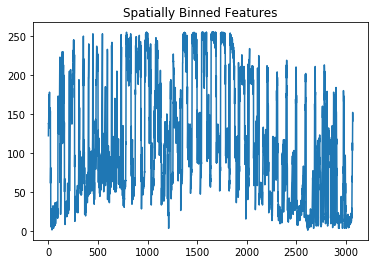

In [7]:
importlib.reload(object_detection_fecvector)
object_detection_fecvector.main_fecvector()

In [8]:
## Image dataset analysis: cars vs. non-cars

util_images/vehicles_smallset\cars1\1.jpeg
Your function returned a count of 1196  cars and 1125  non-cars
of size:  (64, 64, 3)  and data type: uint8


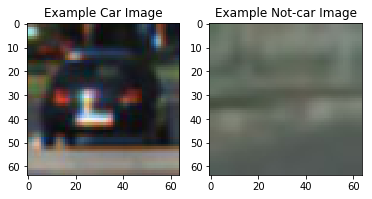

In [9]:
importlib.reload(object_detection_car_notcar)
object_detection_car_notcar.main_look_for_car()

In [10]:
import object_detection_hog_features

# Image data Exploration

# Let's see what kind of images we have for vehicles and non-vehicle objects

In [11]:
car_images = glob('util_images/vehicles/**/*.png')
noncar_images = glob('util_images/non-vehicles/**/*.png')

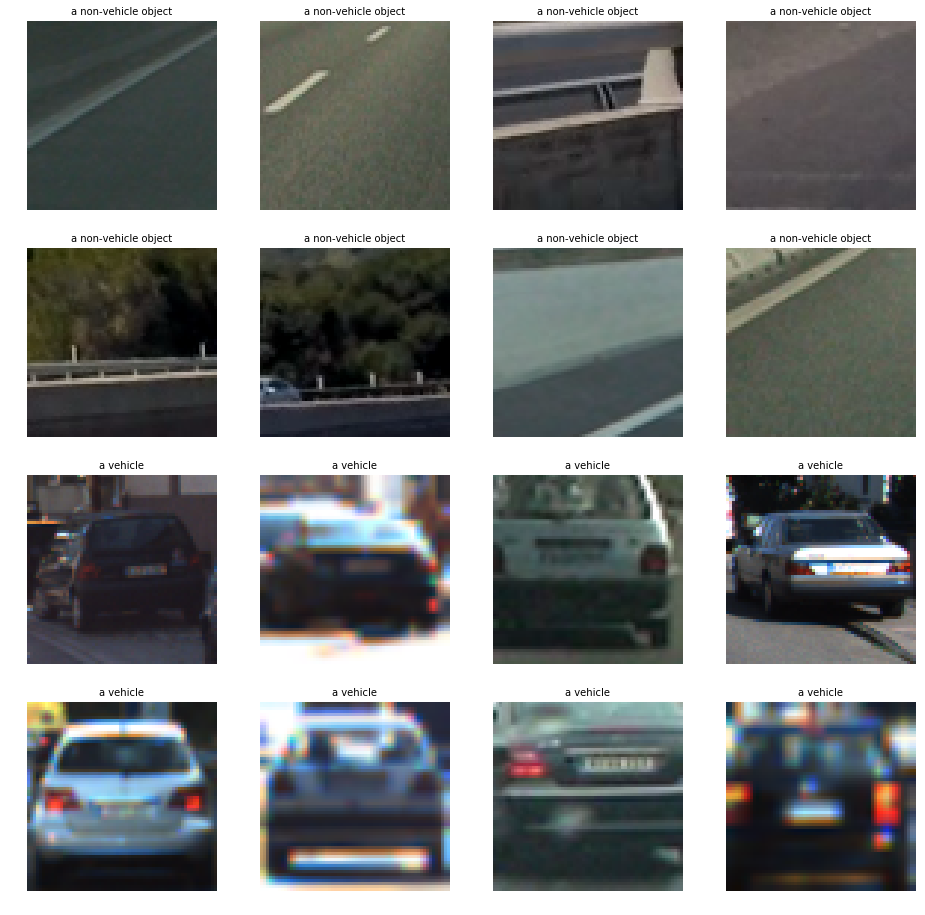

In [12]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
axs = axs.ravel()

for i in np.arange(8):
    img = cv2.imread(noncar_images[np.random.randint(0,len(noncar_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a non-vehicle object', fontsize=10)
    axs[i].imshow(img)

for i in np.arange(8,16):
    img = cv2.imread(car_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('a vehicle', fontsize=10)
    axs[i].imshow(img)
    


In [13]:
print("Number of vehicle images: {}".format(len(car_images)))

print("Number of non-vehicle images: {}".format(len(noncar_images)))

Number of vehicle images: 8792
Number of non-vehicle images: 8968


# Exploring various models and choose the best one

## Calculation of models...

In [14]:
importlib.reload(object_detection_hog_features)
experiments_dict = object_detection_hog_features.main_hog()

Color Space: YCrCb , Hog Channel: 0, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 9, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 9, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 10, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 10, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 11, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: YCrCb , Hog Channel: 0, Orient: 11, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: HLS   , Hog Channel: 0, Orient: 8, Pix per Cell:  8, Cell per Block: 2: calculation
Color Space: HLS   , Hog Channel: 0, Orient: 8, Pix per Cell: 16, Cell per Block: 2: calculation
Color Space: HLS   , Hog C

## Displaying results of calculations for various models...

In [42]:
importlib.reload(object_detection_hog_features)
object_detection_hog_features.print_results(experiments_dict)

CS means Color Space
Or means Orientation
C/B means Cells per Block
P/C means Pixels per Cell


| CS:LUV	| Or:08	| C/B:2	| P/C:08	| Acc 0.9400	| F:001568	|
| CS:LUV	| Or:08	| C/B:2	| P/C:16	| Acc 0.9900	| F:000288	|
| CS:LUV	| Or:09	| C/B:2	| P/C:08	| Acc 0.9450	| F:001764	|
| CS:LUV	| Or:09	| C/B:2	| P/C:16	| Acc 0.9900	| F:000324	|
| CS:LUV	| Or:10	| C/B:2	| P/C:08	| Acc 0.9450	| F:001960	|
| CS:LUV	| Or:10	| C/B:2	| P/C:16	| Acc 0.9700	| F:000360	|
| CS:LUV	| Or:11	| C/B:2	| P/C:08	| Acc 0.9400	| F:002156	|
| CS:LUV	| Or:11	| C/B:2	| P/C:16	| Acc 0.9700	| F:000396	|
| CS:RGB	| Or:08	| C/B:2	| P/C:08	| Acc 0.9500	| F:001568	|
| CS:RGB	| Or:08	| C/B:2	| P/C:16	| Acc 0.9800	| F:000288	|
| CS:RGB	| Or:09	| C/B:2	| P/C:08	| Acc 0.9350	| F:001764	|
| CS:RGB	| Or:09	| C/B:2	| P/C:16	| Acc 0.9700	| F:000324	|
| CS:RGB	| Or:10	| C/B:2	| P/C:08	| Acc 0.9400	| F:001960	|
| CS:RGB	| Or:10	| C/B:2	| P/C:16	| Acc 0.9850	| F:000360	|
| CS:RGB	| Or:11	| C/B:2	| P/C:08	| Acc 0.9150	| F:002156	|
| CS

# Extracing HOG (Histogram of Oriented Gradients) features for 2 examples

Text(0.5,1,'Non-Car HOG')

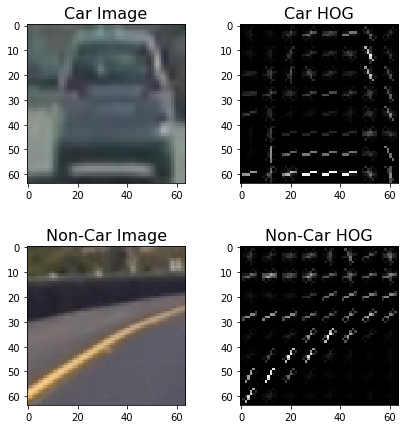

In [41]:
car_img = mpimg.imread(car_images[5])
_, car_dst = object_detection_hog_features.get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
noncar_img = mpimg.imread(noncar_images[5])
_, noncar_dst = object_detection_hog_features.get_hog_features(noncar_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(noncar_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(noncar_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)

In [18]:
import object_detection_hog_subsumpling
importlib.reload(object_detection_hog_subsumpling)

<module 'object_detection_hog_subsumpling' from 'C:\\Users\\rafal\\Documents\\GitHub\\Udacity-CarND\\CarND-Vehicle-Detection-master\\object_detection_hog_subsumpling.py'>